<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Amiri</h4>
<h4 align="center">Sharif University of Technology, Spring 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Parsa Hatami

**Student ID**: 400100962



## **Briefing:**
 **In this section, we are going to investigate linear regression and its extensions ridge and lasso shrinkage methods in Boston dataset.**

In [34]:
## Import necessary libraries here ##

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import Ridge , RidgeCV , Lasso , LassoCV

**Part 1:**
First familiarize yourself with Boston dataset. Briefly explain its features and dataset's shape. You are provided with the required dataset named **boston.csv**.

In [24]:
## Write your code here ##

# Load dataset
df = pd.read_csv('Q1/boston.csv')

# features of the dataset
print("/ / / / / / / / / / / / / / / / / / /")
print("Features : \n")
print(df.columns)

# shape of the dataset
print("/ / / / / / / / / / / / / / / / / / /")
print("Shape : \n")
print(df.shape)

# summary statistics of the dataset
print("/ / / / / / / / / / / / / / / / / / /")
print("Summary statistics : \n")
print(df.describe())

# information of the dataset
print("/ / / / / / / / / / / / / / / / / / /")
print("Information : \n")
print(df.info())

# first few records of the dataset
print("/ / / / / / / / / / / / / / / / / / /")
print("First few records : \n")
df.head()


/ / / / / / / / / / / / / / / / / / /
Features : 

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')
/ / / / / / / / / / / / / / / / / / /
Shape : 

(506, 14)
/ / / / / / / / / / / / / / / / / / /
Summary statistics : 

             CRIM          ZN       INDUS        CHAS          NX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


**Part 2:**
Split dataset into train and test sets. Train linear regression model using all of the features. Report $R^2$ and RMSE error metrics for both train and test sets. Also report all of the coefficients.

In [22]:
## Write your code here ##

X = df.drop('MEDV', axis=1)
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = mean_squared_error(y_train, y_train_pred, squared=False)
rmse_test = mean_squared_error(y_test, y_test_pred, squared=False)

# Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})

print("Train Set:")
print("R^2 :", r2_train)
print("RMSE:", rmse_train)
print("\nTest Set:")
print("R^2 :", r2_test)
print("RMSE:", rmse_test)
print("\nCoefficients:\n", coefficients)


Train Set:
R^2 : 0.7508856358979672
RMSE: 4.6520331848801675

Test Set:
R^2 : 0.6687594935356349
RMSE: 4.928602182665315

Coefficients:
     Feature  Coefficient
0      CRIM    -0.113056
1        ZN     0.030110
2     INDUS     0.040381
3      CHAS     2.784438
4        NX   -17.202633
5        RM     4.438835
6       AGE    -0.006296
7       DIS    -1.447865
8       RAD     0.262430
9       TAX    -0.010647
10  PTRATIO    -0.915456
11        B     0.012351
12    LSTAT    -0.508571


**Part 3:**
Now, we want to see the effect of ridge regression on learning process. To do so, set the alphas parameter as follows for synchronization:$$ alphas = 10*np.linspace (3,-3,100) *0.5$$

R^2-Train: 0.7508856341998674
R^2-Test: 0.6687590971753121
RMSE-Train: 4.65203320073557
RMSE-Test: 4.928605131431739
    Feature  Coefficient
0      CRIM    -0.113052
1        ZN     0.030112
2     INDUS     0.040351
3      CHAS     2.784258
4        NX   -17.195733
5        RM     4.438874
6       AGE    -0.006302
7       DIS    -1.447767
8       RAD     0.262417
9       TAX    -0.010648
10  PTRATIO    -0.915377
11        B     0.012352
12    LSTAT    -0.508584


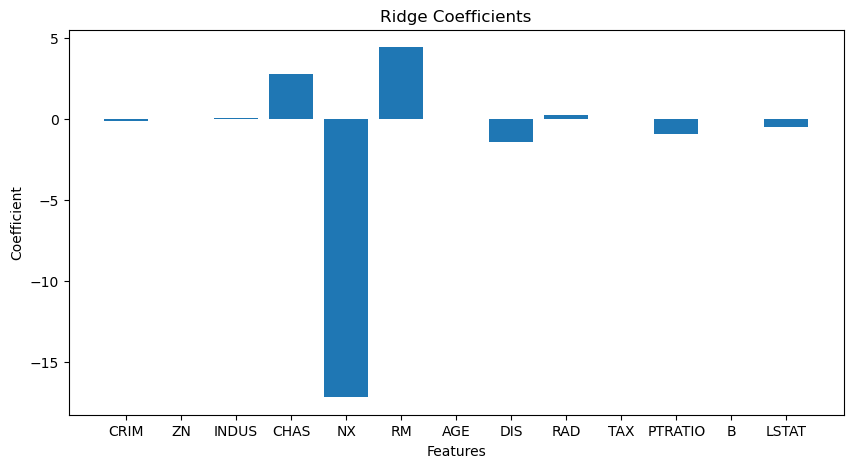

In [26]:
## Write your code here ##

# alphas
alphas = 10**np.linspace(3, -3, 100) * 0.5

ridge_model = RidgeCV(alphas=alphas, cv=5)
ridge_model.fit(X_train, y_train)

y_train_pred = ridge_model.predict(X_train)
y_test_pred = ridge_model.predict(X_test)

# Calculate R^2
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_model.coef_})

print(f"R^2-Train: {r2_train}")
print(f"R^2-Test: {r2_test}")
print(f"RMSE-Train: {rmse_train}")
print(f"RMSE-Test: {rmse_test}")

print(coefficients)

plt.figure(figsize=(10, 5))
plt.bar(coefficients['Feature'], coefficients['Coefficient'])
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.title('Ridge Coefficients')
plt.show()

 Now, plot the following in separate plots:

1- MSE for train and test versus α

2- Coefficients versus α

3- Number of not-considered features versus α

Finally select the optimal value of α. Report MSE, $R^2$ and coefficients.Compare this case with the linear regression case.

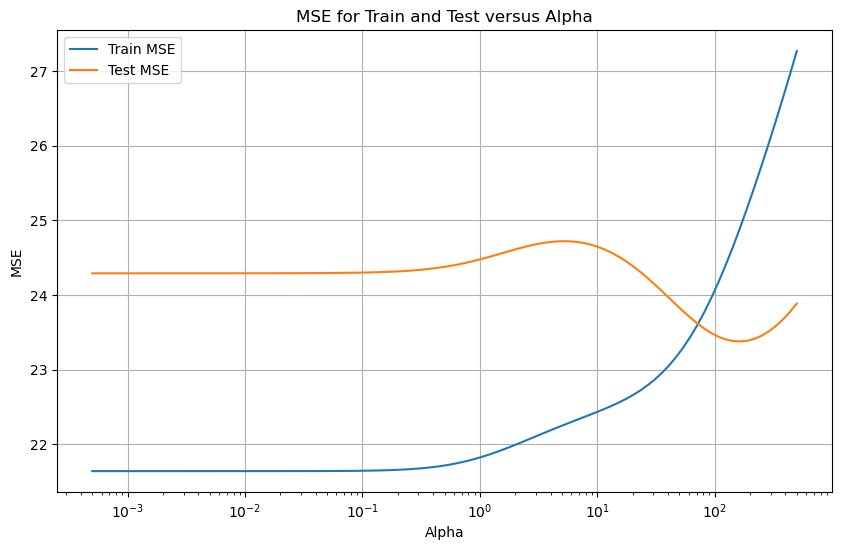

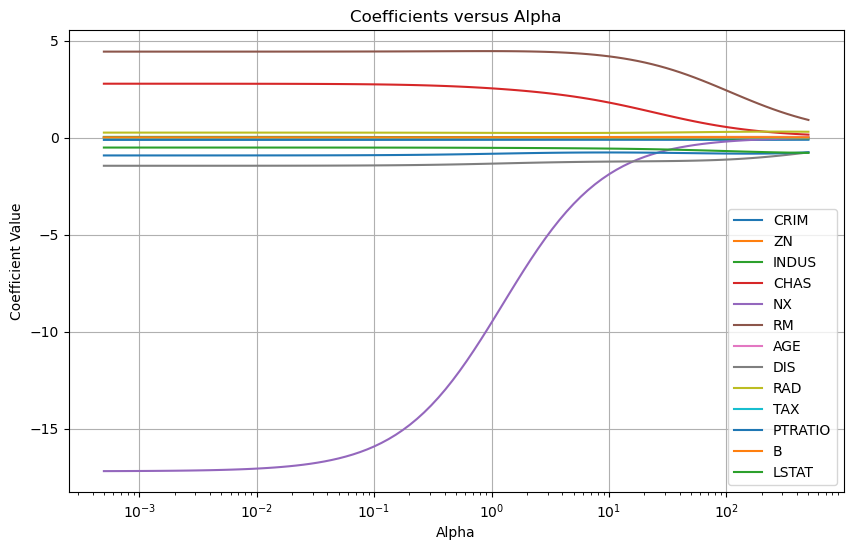

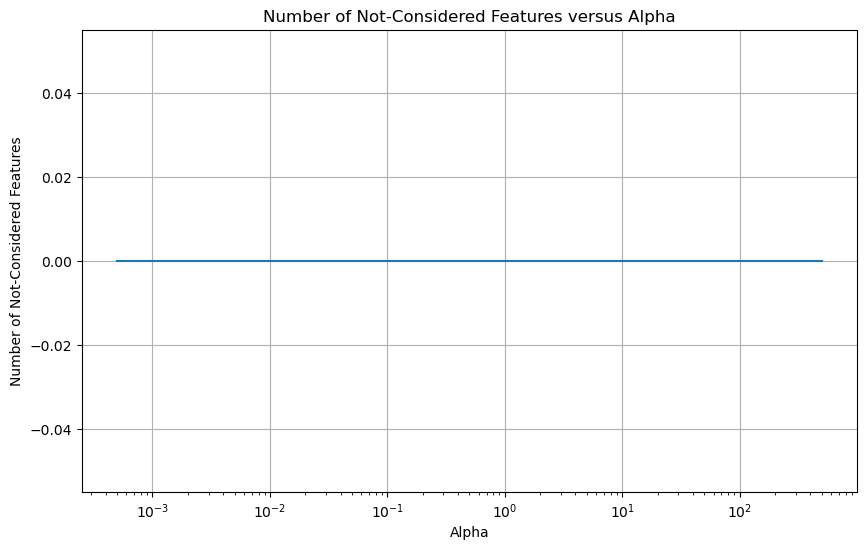

Optimal Alpha: 163.72745814388642
MSE for Optimal Alpha: 23.378168171507365
R^2 for Optimal Alpha: 0.6812087531281754
Coefficients for Optimal Alpha:
     Feature  Coefficient
0      CRIM    -0.113052
1        ZN     0.030112
2     INDUS     0.040351
3      CHAS     2.784258
4        NX   -17.195733
5        RM     4.438874
6       AGE    -0.006302
7       DIS    -1.447767
8       RAD     0.262417
9       TAX    -0.010648
10  PTRATIO    -0.915377
11        B     0.012352
12    LSTAT    -0.508584


In [33]:
## Write your code here ##

mse_train = []
mse_test = []
coefficients = []
not_considered_features = []

# for each alpha value
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    # predictions 
    y_train_pred = ridge.predict(X_train)
    y_test_pred = ridge.predict(X_test)
    # Calculate MSE
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    coefficients.append(ridge.coef_)
    not_considered_features.append(np.sum(ridge.coef_ == 0))

# Convert lists to arrays
mse_train = np.array(mse_train)
mse_test = np.array(mse_test)
coefficients = np.array(coefficients)
not_considered_features = np.array(not_considered_features)

# Plot MSE versus α
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train, label='Train MSE')
plt.plot(alphas, mse_test, label='Test MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus Alpha')
plt.legend()
plt.grid()
plt.show()

# Plot Coefficients versus α
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=X.columns[i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients versus Alpha')
plt.legend()
plt.grid()
plt.show()

# Plot Number of not-considered features versus α
plt.figure(figsize=(10, 6))
plt.plot(alphas, not_considered_features)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features versus Alpha')
plt.grid()
plt.show()

# index of the optimal alpha value
optimal_alpha_index = np.argmin(mse_test)
optimal_alpha = alphas[optimal_alpha_index]

ridge_optimal = Ridge(alpha=optimal_alpha)
ridge_optimal.fit(X_train, y_train)

y_test_pred_optimal = ridge_optimal.predict(X_test)

# MSE and R^2 for the optimal model
mse_optimal = mean_squared_error(y_test, y_test_pred_optimal)
r2_optimal = r2_score(y_test, y_test_pred_optimal)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge_model.coef_})

print(f'Optimal Alpha: {optimal_alpha}')
print(f'MSE for Optimal Alpha: {mse_optimal}')
print(f'R^2 for Optimal Alpha: {r2_optimal}')
print(f'Coefficients for Optimal Alpha:\n {coefficients}')


**Part 4:**
Repeat Part 3 with lasso regression. Where do you think we should consider using lasso regression?  

Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e., models with fewer parameters). This particular type of regression is well-suited for models showing high levels of multicollinearity or when we want to automate certain parts of model selection, like variable selection/parameter elimination.

The key difference between ridge regression and lasso regression is the penalty term in their cost functions. While ridge regression uses L2 regularization (squared magnitude of coefficients), lasso regression uses L1 regularization (absolute value of coefficients). This difference makes lasso regression eliminate some of the less important features by making their coefficients exactly zero, effectively performing feature selection.

So, when should we consider using lasso regression?

1. **Feature Selection**: If we have a large number of features and believe that only a few of them are important, lasso can help to select the important features. This is because lasso tends to make coefficients for less important features exactly zero, effectively performing feature selection.

2. **Interpretability**: If we want a model that is easy to interpret, lasso can help to make the model simpler and more interpretable by removing less important features.

3. **Collinearity**: If we have high collinearity among the features, lasso can help to handle this by choosing only one feature from a group of correlated features.


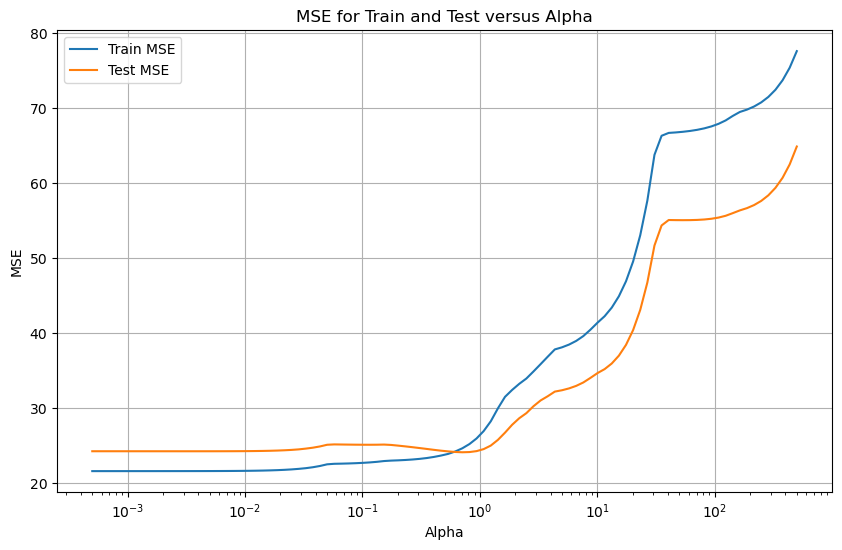

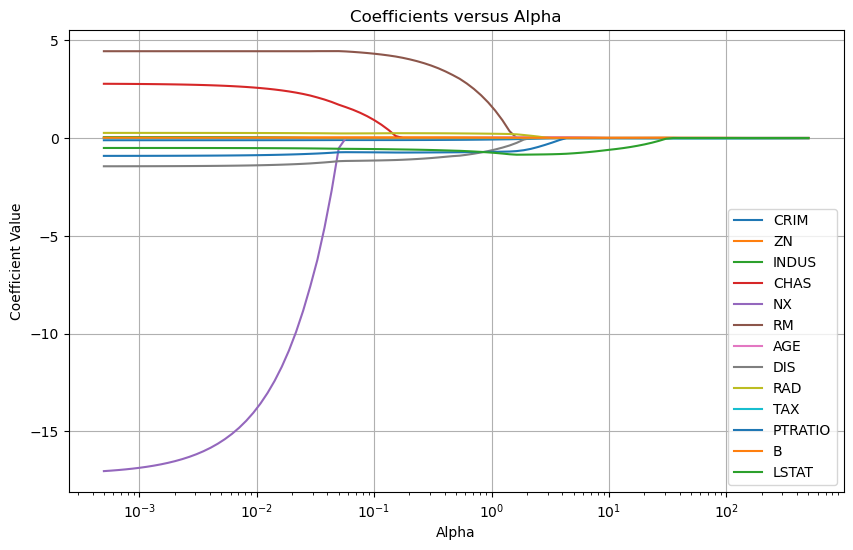

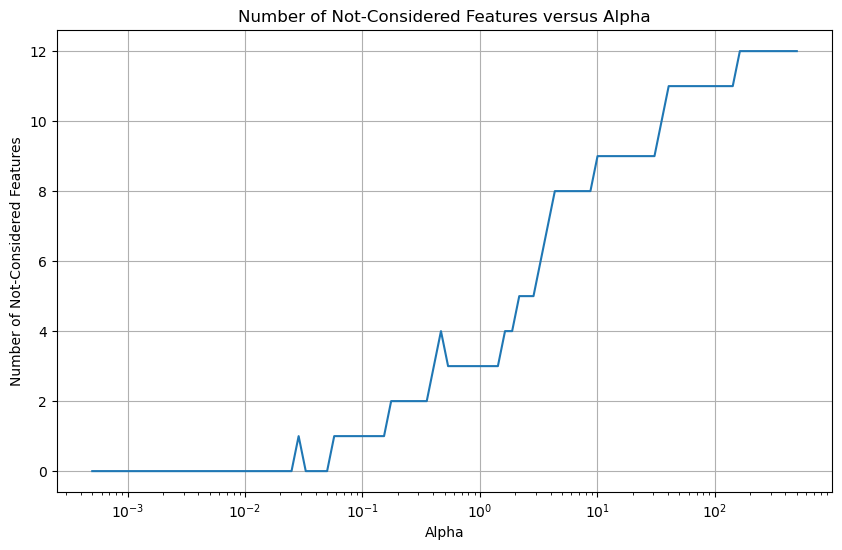

Optimal Alpha: 0.7087370814634024
MSE for Optimal Alpha: 24.15321924307336
R^2 for Optimal Alpha: 0.6706399397086964
Coefficients for Optimal Alpha:
     Feature  Coefficient
0      CRIM    -0.086167
1        ZN     0.030807
2     INDUS    -0.000000
3      CHAS     0.000000
4        NX    -0.000000
5        RM     2.508244
6       AGE     0.006114
7       DIS    -0.801558
8       RAD     0.229311
9       TAX    -0.012707
10  PTRATIO    -0.720572
11        B     0.011866
12    LSTAT    -0.689536


In [35]:
## Write your code here ##

mse_train = []
mse_test = []
coefficients = []
not_considered_features = []

# for each alpha value
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    # predictions 
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    # Calculate MSE
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    coefficients.append(lasso.coef_)
    not_considered_features.append(np.sum(lasso.coef_ == 0))

# Convert lists to arrays
mse_train = np.array(mse_train)
mse_test = np.array(mse_test)
coefficients = np.array(coefficients)
not_considered_features = np.array(not_considered_features)

# Plot MSE versus α
plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_train, label='Train MSE')
plt.plot(alphas, mse_test, label='Test MSE')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('MSE')
plt.title('MSE for Train and Test versus Alpha')
plt.legend()
plt.grid()
plt.show()

# Plot Coefficients versus α
plt.figure(figsize=(10, 6))
for i in range(coefficients.shape[1]):
    plt.plot(alphas, coefficients[:, i], label=X.columns[i])
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients versus Alpha')
plt.legend()
plt.grid()
plt.show()

# Plot Number of not-considered features versus α
plt.figure(figsize=(10, 6))
plt.plot(alphas, not_considered_features)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Number of Not-Considered Features')
plt.title('Number of Not-Considered Features versus Alpha')
plt.grid()
plt.show()

# index of the optimal alpha value
optimal_alpha_index = np.argmin(mse_test)
optimal_alpha = alphas[optimal_alpha_index]

lasso_optimal = Lasso(alpha=optimal_alpha)
lasso_optimal.fit(X_train, y_train)

y_test_pred_optimal = lasso_optimal.predict(X_test)

# MSE and R^2 for the optimal model
mse_optimal = mean_squared_error(y_test, y_test_pred_optimal)
r2_optimal = r2_score(y_test, y_test_pred_optimal)

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso_optimal.coef_})

print(f'Optimal Alpha: {optimal_alpha}')
print(f'MSE for Optimal Alpha: {mse_optimal}')
print(f'R^2 for Optimal Alpha: {r2_optimal}')
print(f'Coefficients for Optimal Alpha:\n {coefficients}')

**Part 5:**
In this part, we intend to see the effect of ridge and lasso regression methods in overfitting prevention. In order to do this, change the ratio of training data to the whole data from low to high. As you know, the lower the ratio of trainig data, the more likely the overfitting would be. for each ratio, fit linear regression, ridge regression and lasso regression to data and then plot the following:

1- $R^2$ for test data versus ratio of training data (Three methods in one plot)

2- Selected α value versus training data ratio for ridge and lasso regression methods (In one plot)

How is the overall behavior of these plots and how do you analyze them?

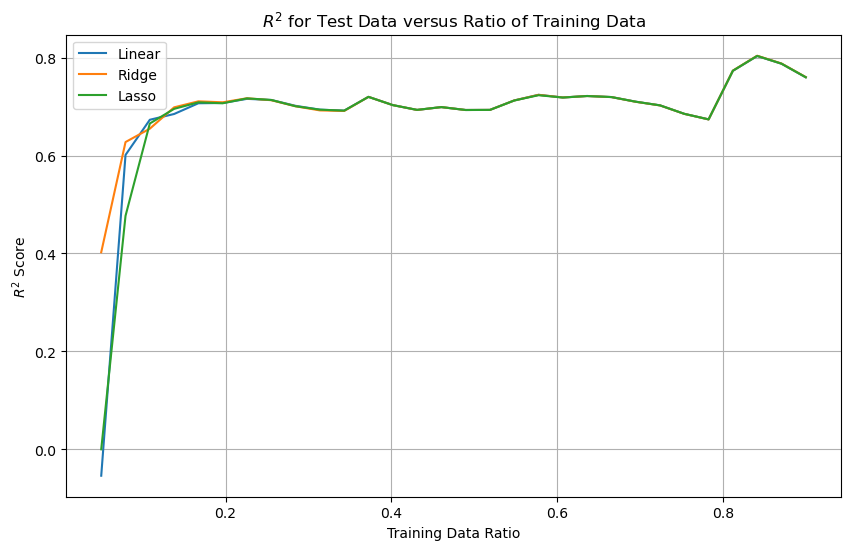

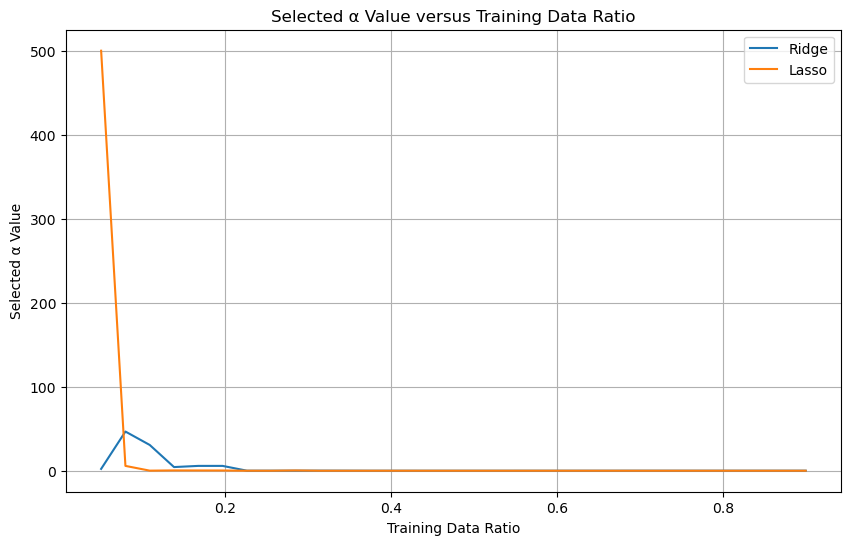

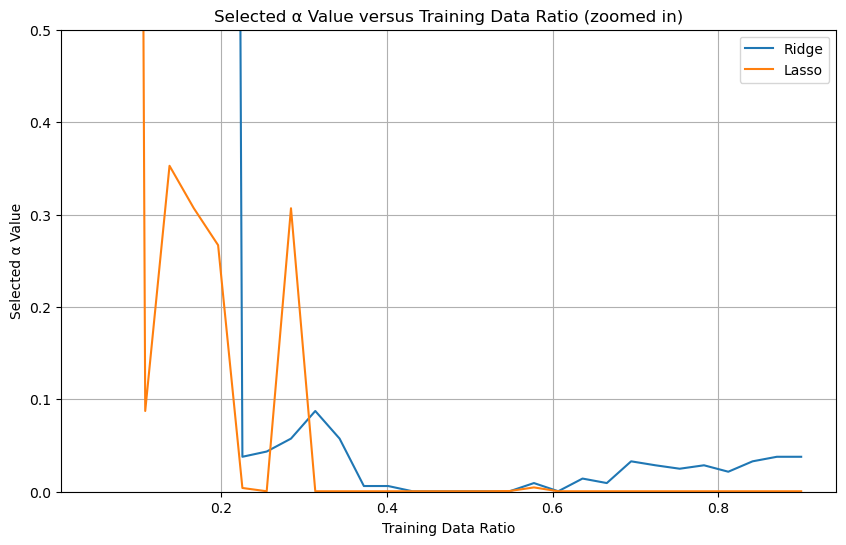

In [50]:
## Write you code here ##

from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Define a range of training data ratios
ratios = np.linspace(0.05, 0.9, 30)

# Initialize lists to store results
r2_linear = []
r2_ridge = []
r2_lasso = []
alpha_ridge = []
alpha_lasso = []

# Define the alphas
alphas = 10**np.linspace(3, -3, 100) * 0.5

# For each ratio
for ratio in ratios:
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio, random_state=42)

    # Fit a Linear regression model
    linear = LinearRegression()
    linear.fit(X_train, y_train)
    r2_linear.append(r2_score(y_test, linear.predict(X_test)))

    # Fit a Ridge regression model
    ridge = RidgeCV(alphas=alphas)
    ridge.fit(X_train, y_train)
    r2_ridge.append(r2_score(y_test, ridge.predict(X_test)))
    alpha_ridge.append(ridge.alpha_)

    # Fit a Lasso regression model
    lasso = LassoCV(alphas=alphas)
    lasso.fit(X_train, y_train)
    r2_lasso.append(r2_score(y_test, lasso.predict(X_test)))
    alpha_lasso.append(lasso.alpha_)

# Plot R^2 for test data versus ratio of training data
plt.figure(figsize=(10, 6))
plt.plot(ratios, r2_linear, label='Linear')
plt.plot(ratios, r2_ridge, label='Ridge')
plt.plot(ratios, r2_lasso, label='Lasso')
plt.xlabel('Training Data Ratio')
plt.ylabel('$R^2$ Score')
plt.title('$R^2$ for Test Data versus Ratio of Training Data')
plt.legend()
plt.grid()
plt.show()

# Plot Selected α value versus training data ratio
plt.figure(figsize=(10, 6))
plt.plot(ratios, alpha_ridge, label='Ridge')
plt.plot(ratios, alpha_lasso, label='Lasso')
plt.xlabel('Training Data Ratio')
plt.ylabel('Selected α Value')
plt.title('Selected α Value versus Training Data Ratio')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(ratios, alpha_ridge, label='Ridge')
plt.plot(ratios, alpha_lasso, label='Lasso')
plt.xlabel('Training Data Ratio')
plt.ylabel('Selected α Value')
plt.ylim(0, 0.5)
plt.title('Selected α Value versus Training Data Ratio (zoomed in)')
plt.legend()
plt.grid()
plt.show()

As the proportion of training data increases, we would expect the $R^2$ value for the test data to generally improve for all three models, as they have more information to learn from. However, the rate of improvement and the maximum $R^2$ achieved can vary between the models.

Linear regression, lacking any regularization, might start to overfit as the training data ratio increases, especially if the dataset has many features or if the features are highly correlated. This could lead to a plateau or even a decrease in the $R^2$ value for the test data.

Ridge regression, with its L2 regularization, can handle multicollinearity better and prevent overfitting to some extent. Therefore, its $R^2$ value for the test data might continue to improve as the training data ratio increases, but at a slower rate compared to linear regression.

Lasso regression, with its L1 regularization, not only prevents overfitting but also performs feature selection. Therefore, its $R^2$ value for the test data might improve rapidly as the training data ratio increases, especially if only a subset of the features are relevant for prediction.

The selected alpha value for both ridge and lasso regression is expected to decrease as the ratio of training data increases. This is because as we have more data to learn from, the models become less reliant on the regularization to prevent overfitting.

However, the rate of decrease might be different for ridge and lasso regression. Ridge regression, which spreads the coefficient values across many features, might require a higher alpha value compared to lasso regression, which tends to concentrate the coefficient values on a subset of features. Therefore, the alpha value for ridge regression might decrease more slowly compared to lasso regression.

These trends provide insights into the behavior of these models and their ability to prevent overfitting. However, the actual trends can vary depending on the specific characteristics of the dataset.